In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
%matplotlib inline
%matplotlib notebook

## Reading in IMDb, TMDB and CPI Dataset

In [2]:
# WARNING: MAY NEED TO CHANGE SOME OF THE FILE NAMES 
# CPI dataset
cpi = pd.read_csv("CPIAUCNS.csv")
# TMDB dataset
dfm = pd.read_csv("movies.csv").rename(columns={'imdb_id':'imdb_title_id'})\
.set_index('imdb_title_id')

# IMDb moive dataset
df1 = pd.read_csv('./IMDb_movie_dataset/IMDb_movies.csv').set_index("imdb_title_id") 
# IMDb ratings dataset
df1_ratings = pd.read_csv("./IMDb_movie_dataset/IMDb_ratings.csv")\
.set_index("imdb_title_id") 

df1 = df1.join(df1_ratings, how = 'left')
df1 = df1[df1['country'].str.contains('[USA]').fillna(False)]
df1.head()

/Users/ejdunks/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,title,original_title,year,date_published,genre,duration,country,language,director,writer,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,5.1,13.0,6.5,15.0,5.5,67.0,5.9,173.0,5.6,181.0
tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",...,7.2,6.0,9.7,9.0,5.4,37.0,5.8,109.0,5.4,68.0


## Fixing the Genre Column

In [4]:
dfm['genre_abr'] = dfm['genres'].str.split('}').str[0]
dfm['primary_genre'] = dfm['genre_abr'].str.split("'name':").str[1]
dfm['primary_genre'] = dfm.primary_genre.str.replace(' ','')
df1 = df1.merge(dfm, on='imdb_title_id',how="left")
df1.head()

,title,original_title_x,year,date_published,genre,duration,country,language,director,writer,...,genres,release_date,runtime,budget_y,popularity,vote_average,vote_count,original_language,genre_abr,primary_genre
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"[{'id': 10749, 'name': 'Romance'}]",1894-10-08,45.0,0.0,0.871,1.0,1.0,en,"[{'id': 10749, 'name': 'Romance'",'Romance'
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,"[{'id': 36, 'name': 'History'}, {'id': 28, 'na...",1906-12-26,32.0,0.0,1.474,5.3,24.0,en,"[{'id': 36, 'name': 'History'",'History'
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1912-11-13,88.0,0.0,0.946,2.9,11.0,en,"[{'id': 18, 'name': 'Drama'",'Drama'
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,"[{'id': 18, 'name': 'Drama'}]",1912-10-03,71.0,0.0,1.189,5.3,17.0,en,"[{'id': 18, 'name': 'Drama'",'Drama'
tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",...,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1912-10-15,55.0,30000.0,1.455,4.7,6.0,en,"[{'id': 18, 'name': 'Drama'",'Drama'


# Cleaning the DataFrame

In [5]:
# Cleaned usa_gross_income
df1 = df1[~df1['usa_gross_income'].str.contains("[a-zA-Z]").fillna(False)]
df1['usa_gross_income'] = df1['usa_gross_income'].str.replace('$', '').fillna(0)\
.astype(int)
df1.head()

/Users/ejdunks/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,title,original_title_x,year,date_published,genre,duration,country,language,director,writer,...,genres,release_date,runtime,budget_y,popularity,vote_average,vote_count,original_language,genre_abr,primary_genre
imdb_title_id,,,,,,,,,,,,,,,,,,,,,
tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,"[{'id': 10749, 'name': 'Romance'}]",1894-10-08,45.0,0.0,0.871,1.0,1.0,en,"[{'id': 10749, 'name': 'Romance'",'Romance'
tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,"[{'id': 36, 'name': 'History'}, {'id': 28, 'na...",1906-12-26,32.0,0.0,1.474,5.3,24.0,en,"[{'id': 36, 'name': 'History'",'History'
tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1912-11-13,88.0,0.0,0.946,2.9,11.0,en,"[{'id': 18, 'name': 'Drama'",'Drama'
tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,"[{'id': 18, 'name': 'Drama'}]",1912-10-03,71.0,0.0,1.189,5.3,17.0,en,"[{'id': 18, 'name': 'Drama'",'Drama'
tt0002461,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",...,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",1912-10-15,55.0,30000.0,1.455,4.7,6.0,en,"[{'id': 18, 'name': 'Drama'",'Drama'


### Accounting for inflation

In [6]:
# ADJUSTING INCOME TO 2021 DOLLARS
cpi['year'] = cpi['DATE'].str[:4]
cpi.year = cpi.year.astype(str)
df1.year = df1.year.astype(str)
df1 =  pd.merge(df1, cpi, on="year", how="left")
df1['CPIAUCNS'] = pd.to_numeric(df1.CPIAUCNS[:-1], downcast="float")
df1['multiplier'] = (262.231 - df1['CPIAUCNS']) / df1['CPIAUCNS'] + 1
df1['usa_gross_income'] = df1['usa_gross_income'] * df1['multiplier']
df1.head()

,title,original_title_x,year,date_published,genre,duration,country,language,director,writer,...,budget_y,popularity,vote_average,vote_count,original_language,genre_abr,primary_genre,DATE,CPIAUCNS,multiplier
0,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,...,0.0,0.871,1.0,1.0,en,"[{'id': 10749, 'name': 'Romance'",'Romance',NaN,NaN,NaN
1,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,...,0.0,1.474,5.3,24.0,en,"[{'id': 36, 'name': 'History'",'History',NaN,NaN,NaN
2,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,...,0.0,0.946,2.9,11.0,en,"[{'id': 18, 'name': 'Drama'",'Drama',NaN,NaN,NaN
3,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,...,0.0,1.189,5.3,17.0,en,"[{'id': 18, 'name': 'Drama'",'Drama',NaN,NaN,NaN
4,Richard III,Richard III,1912,1912-10-15,Drama,55,"France, USA",English,"André Calmettes, James Keane","James Keane, William Shakespeare",...,30000.0,1.455,4.7,6.0,en,"[{'id': 18, 'name': 'Drama'",'Drama',NaN,NaN,NaN


## Data Viz

In [7]:
def avg(group):
    return group.mean()
votes = df1.groupby(['primary_genre']).agg({'weighted_average_vote':'mean'})\
.reset_index().sort_values('weighted_average_vote',ascending=False)
gi = df1.groupby(['primary_genre']).agg({'usa_gross_income':'mean'}).reset_index()\
.sort_values('usa_gross_income',ascending=False)
df1.dropna(subset = ['primary_genre'], inplace=True)
genres = df1.primary_genre.unique()

<IPython.core.display.Javascript object>


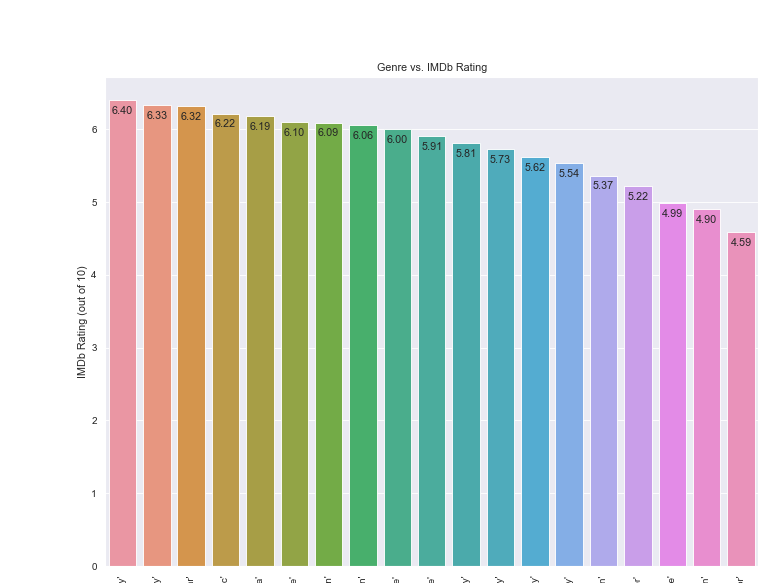

In [8]:
plt.figure(figsize=(13,10))
sns.set(rc = {'figure.figsize':(12,8)})

splot = sns.barplot(x='primary_genre',y='weighted_average_vote', data=votes)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=12,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()
plt.xticks(rotation=90)
plt.title("Genre vs. IMDb Rating")
plt.xlabel("Genre")
plt.ylabel("IMDb Rating (out of 10)")
pass

<IPython.core.display.Javascript object>


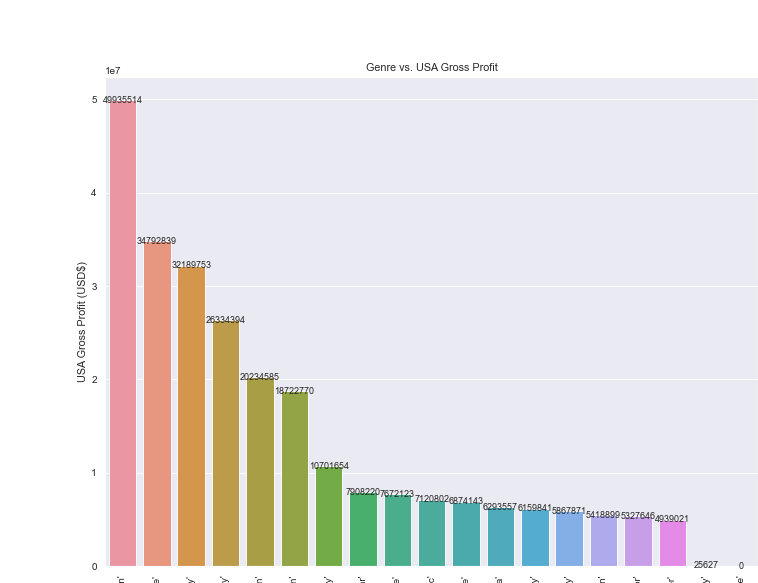

In [9]:
plt.figure(figsize=(13,10))
sns.set(rc = {'figure.figsize':(12,8)})
splot = sns.barplot(x='primary_genre',y='usa_gross_income',data=gi)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=10,
                   xytext = (0, 0), 
                   textcoords = 'offset points')
plt.show()
plt.xticks(rotation=90)
plt.title("Genre vs. USA Gross Profit")
plt.xlabel("Genre")
plt.ylabel('USA Gross Profit (USD$)')
pass